In [16]:
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import OneHotEncoder
from sklearn.base import BaseEstimator
import nltk
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
from scipy.sparse import hstack

from sklearn.ensemble import RandomForestRegressor



In [17]:
pd.options.display.float_format = '{:,.2f}'.format
sns.set_theme()
nltk.download("stopwords");

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [18]:
train_df = pd.read_csv("../data/train_dataset_train.csv", index_col=0)
test_df = pd.read_csv("../data/test_dataset_test.csv", index_col=0)
train_df["is_train"] = 1
test_df["is_train"] = 0

df = pd.concat([train_df, test_df])


## Проведем EDA

In [19]:
df.head()

,title,publish_date,session,authors,ctr,category,tags,views,depth,full_reads_percent,is_train
document_id,,,,,,,,,,,
624ac09c9a7947db3d80c98eIDE7mtH4RBqGn-8MXfGffQ,Европейский банк развития приостановил доступ ...,2022-04-04 10:29:44,IDE7mtH4RBqGn-8MXfGffQ,[],1.58,5409f11ce063da9c8b588a18,"['55928d339a794751dc8303d6', '542d1e28cbb20f86...","20,460.00",1.13,35.85,1
620f6b899a7947701cf489e1KtVJsteHStO5oditt3Uvzw,Кремль назвал регулярным процессом учебные зап...,2022-02-18 10:00:39,KtVJsteHStO5oditt3Uvzw,"['54244e01cbb20f03076b236d','5878a2ec9a7947e53...",1.85,5409f11ce063da9c8b588a12,"['549d25df9a794775979561d2', '58abcf539a7947f1...","19,038.00",1.14,38.35,1
620730cf9a7947ab96a44e27hk7puWJwSziw0m3sfTkKWA,Госсекретарь Швеции заявила о нежелании вступа...,2022-02-12 04:24:02,hk7puWJwSziw0m3sfTkKWA,[],0.00,5409f11ce063da9c8b588a12,"['5430f451cbb20f73931ecd05', '5409f15de063daa0...","51,151.00",1.19,36.42,1
6262a5889a79470b78c9ca307UKY2SSZTjCcjhwBzxw37w,Песков назвал прагматичной выдачу лицензии Газ...,2022-04-22 13:24:55,7UKY2SSZTjCcjhwBzxw37w,[],0.00,5409f11ce063da9c8b588a12,"['5409f297e063daa0f408b11c', '545caa9ecbb20f36...","3,782.00",1.05,30.17,1
626678929a79477ca0101568wuMYES90REuV5YhrN75IXg,В Хабаровске задержали главу филиала РАНХиГС п...,2022-04-25 10:42:23,wuMYES90REuV5YhrN75IXg,[],0.00,5433e5decbb20f277b20eca9,"['5409f42ae063daa0f408b5d7', '585c20e19a79470e...","3,065.00",1.06,34.62,1


### Целевые колонки

In [20]:
goal = df[["views", "depth", "full_reads_percent"]]

In [22]:
goal.describe()

,views,depth,full_reads_percent
count,"7,000.00","7,000.00","7,000.00"
mean,"30,351.62",1.10,34.62
std,"95,477.86",0.07,10.78
min,65.00,1.02,4.98
25%,"5,438.25",1.05,27.52
50%,"11,962.00",1.08,34.33
75%,"27,053.00",1.15,41.37
max,"2,554,204.00",1.80,267.62


In [23]:
goal.corr()

,views,depth,full_reads_percent
views,1.00,0.39,-0.11
depth,0.39,1.00,0.19
full_reads_percent,-0.11,0.19,1.00


In [24]:
for views_count in [25000, 50000, 100000, 500000, 1000000]:
    print(f"Есть {(goal.views > views_count).sum()} строк с количеством view > {views_count}")

Есть 1882 строк с количеством view > 25000
Есть 919 строк с количеством view > 50000
Есть 375 строк с количеством view > 100000
Есть 26 строк с количеством view > 500000
Есть 7 строк с количеством view > 1000000


In [25]:
for depth_count in [1.20, 1.40, 1.60, 1.7, 1.79]:
    print(f"Есть {(goal.depth > depth_count).sum()} строк с количеством depth > {depth_count}")

Есть 390 строк с количеством depth > 1.2
Есть 26 строк с количеством depth > 1.4
Есть 7 строк с количеством depth > 1.6
Есть 6 строк с количеством depth > 1.7
Есть 6 строк с количеством depth > 1.79


In [26]:
for full_reads_percent_count in [42, 50, 60, 63, 80]:
    print(f"Есть {(goal.full_reads_percent > full_reads_percent_count).sum()} строк с количеством full_reads_percent > {full_reads_percent_count}")

Есть 1593 строк с количеством full_reads_percent > 42
Есть 500 строк с количеством full_reads_percent > 50
Есть 58 строк с количеством full_reads_percent > 60
Есть 26 строк с количеством full_reads_percent > 63
Есть 2 строк с количеством full_reads_percent > 80


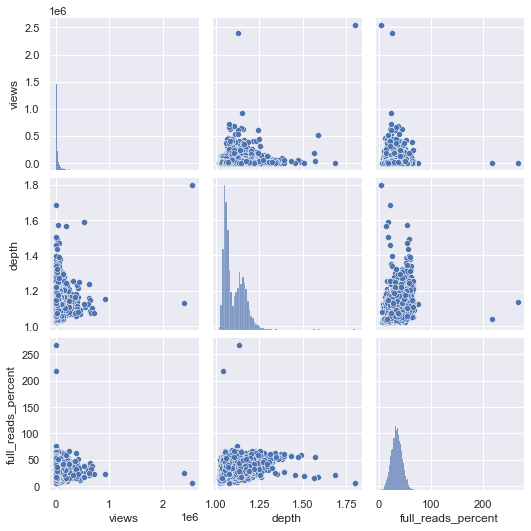

In [27]:
sns.pairplot(goal);

**Наблюдения**:
- есть выбросы по всем колонкам
- думаю стоит обрезать view на 500000, depth на 1.4,  full_reads_percent на 63%
- также стоит попробовать прологарифмировать признаки, чтобы привести их к более "нормальному" виду

In [28]:
df["views_log"] = np.log(np.where(df["views"] < 500000, df["views"], 50000))
df["depth_log"] = np.log(np.log(np.where(df["depth"] < 1.4, df["depth"], 1.4)))
df["full_reads_percent_log"] = np.where(df["full_reads_percent"] < 63, df["full_reads_percent"], 63)

In [29]:
goal = df[["views_log", "depth_log", "full_reads_percent_log"]]

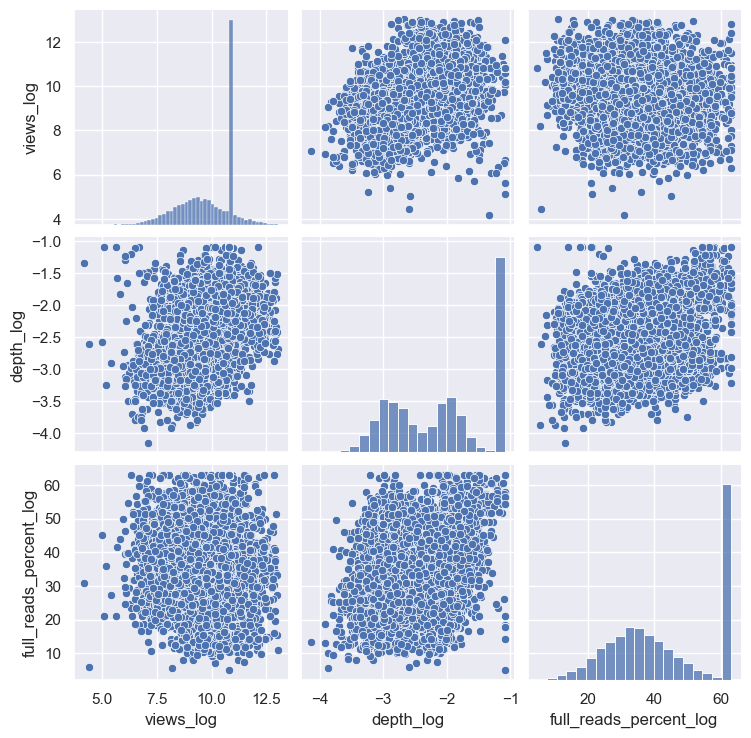

In [30]:
sns.pairplot(goal);

## Посмотрим признаки 
- ctr
- category
- authors
- tags
- session
- publish_date
- title


### ctr

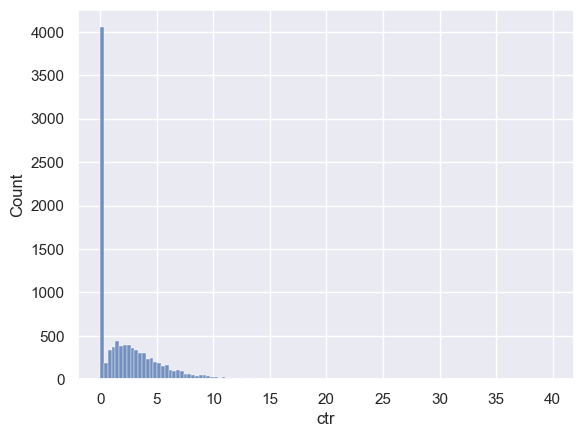

In [31]:
sns.histplot(df.ctr);

In [32]:
df.ctr.value_counts()

0.00    4028
3.76      10
6.10       9
0.88       8
2.40       8
        ... 
7.19       1
5.59       1
9.84       1
4.64       1
3.58       1
Name: ctr, Length: 4101, dtype: int64

- можно выделить в отедльный признак ctr = 0
- график имет длинный правый хвовт - прологарифмируем его
- заполнил заначение пропущенное средним, хотя возможно стоит его предсказывать как-то

In [33]:
df["ctr_zero"] = (df.ctr == 0)

In [34]:
df["ctr_log"] = np.log(df.ctr)
mean_ctr_log = np.mean(df["ctr_log"].values, where=(df["ctr_log"] != -np.inf))
df["ctr_log"] = np.where(df["ctr"] == 0, mean_ctr_log, df["ctr_log"])

C:\_EDU\nlp_rbk_final\venv\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


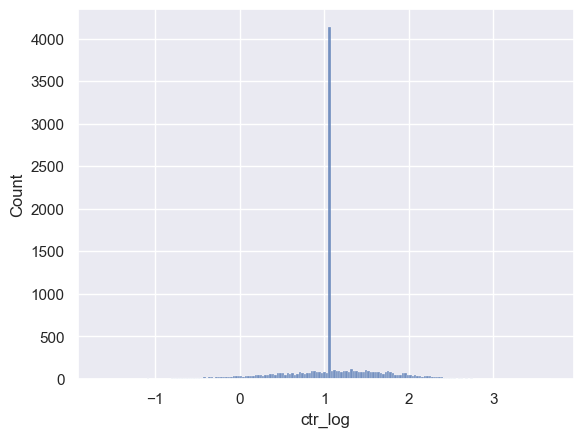

In [35]:
sns.histplot(df["ctr_log"]);

In [36]:
df["ctr_log"][df["ctr_log"] != -np.inf].mean()

1.0688987936753063

### category

In [37]:
df.category.value_counts()

5409f11ce063da9c8b588a12    5706
5433e5decbb20f277b20eca9    2093
540d5eafcbb20f2524fc0509     940
5409f11ce063da9c8b588a13     491
540d5ecacbb20f2524fc050a     410
5409f11ce063da9c8b588a18     357
5e54e2089a7947f63a801742       1
552e430f9a79475dd957f8b3       1
5e54e22a9a7947f560081ea2       1
Name: category, dtype: int64

- 9 категорий, возможно влияют на целевые переменные
- нужно сделать с ними onehotencoding

In [38]:
goal = df[["views_log", "depth_log", "full_reads_percent_log", "category"]]

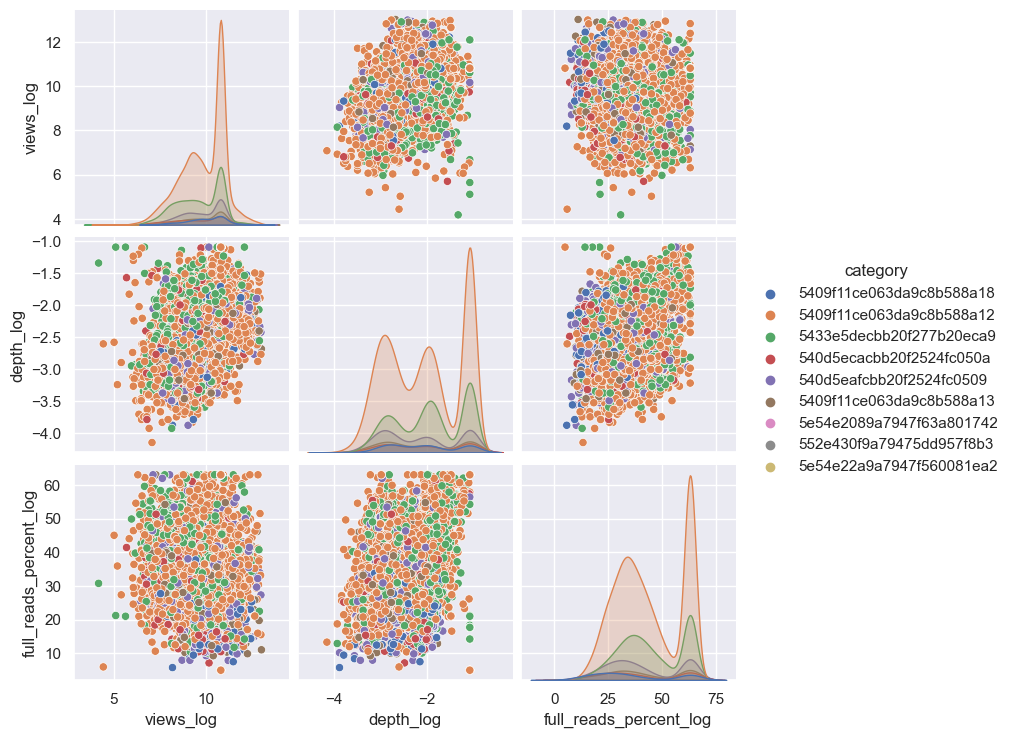

In [39]:
sns.pairplot(goal, hue="category");

### authors, tags

In [40]:
df.authors.value_counts()

[]                                                                                    4129
['604f2c199a79478ec0029eae']                                                           544
['619226fb9a7947e681606cc3']                                                           483
['60bf2f0f9a79475cc856c5a1']                                                           356
['5bfd1d039a794755995093f8']                                                           323
                                                                                      ... 
['5f36b3779a794782606d90c9','54215736cbb20f5cdfa7a8ce']                                  1
['61811d649a7947d02fdf5d95','5f106dd79a7947e2d2c14f68']                                  1
['60b8f9c69a79473345febcbd','604f2c199a79478ec0029eae','587f906a9a7947b089f8dd5a']       1
['619226fb9a7947e681606cc3','5873b29e9a7947969d37690b']                                  1
['6206513e9a79476587e1e14e','5878a2ec9a7947e531faf52c']                                  1

- видимо это список авторов
- имеет смысле выделить признаки: количество авторов, автор не указан, ну и по колонке на каждого автора
- можно составить список авторов

In [41]:
df.tags.value_counts()

[]                                                                                                                                                                                                      39
['5409f191e063daa0f408ae5c', '5409f1a2e063daa0f408ae94', '5409f15de063daa0f408ada8', '5409f140e063daa0f408ad1d', '621a3d0c9a794728d449ae5e']                                                            31
['5577f72f9a7947f6177effbc', '5c124ef99a79476e9d0352d3', '5e2af6549a794790a44be038']                                                                                                                    18
['542f57c3cbb20fb76f1b72f4', '5426f065cbb20f95cd885fe2', '54826f44cbb20f7621273a2f', '5409f1e4e063daa0f408af3b']                                                                                        13
['596cb0199a7947386664c018', '5409f1a3e063daa0f408ae98', '55f311039a79477ea68dca56']                                                                                                        

- по тегам намного больше комбинаций, но обработку наверно стоит сделать аналогичным образом

In [42]:
def clean_list(title):
    return(title.
       replace("[", "").
       replace("]", "").
       replace(".", "").
       replace("'", "").
       replace(",", " ")
      )


In [43]:
df["authors_clean"] = df.authors.apply(clean_list)
df["tags_clean"] = df.tags.apply(clean_list)

In [44]:
df["authors_count"] = df.authors_clean.apply(lambda x: len(x.split()))
df["tags_count"] = df.tags_clean.apply(lambda x: len(x.split()))

In [47]:
vectorizer_tags = TfidfVectorizer()
vectorizer_authors = TfidfVectorizer()

vectorizer_tags.fit(df.tags_clean)
vectorizer_authors.fit(df.authors_clean);


In [48]:
tags_sparse = vectorizer_tags.transform(df.tags_clean)
authors_sparse = vectorizer_authors.transform(df.authors_clean)

### publish_date

In [49]:
df.publish_date = pd.to_datetime(df.publish_date)

In [50]:
df.publish_date.describe(datetime_is_numeric=True)

count                            10000
mean     2022-04-05 06:13:40.379499776
min                2017-08-07 13:00:27
25%      2022-02-19 16:14:33.750000128
50%                2022-04-11 17:26:30
75%      2022-05-05 09:44:20.249999872
max                2022-05-29 20:13:12
Name: publish_date, dtype: object

- у минимальная дата в 2017 году, возможно есть выбросы (8 записей в трейне, 1 в тесте)
- думаю стоит исключить новости до 2021 из трейна
- так новости обысно относятся к апрелю - маю 2022
- нужно выделить стандартные фичи из даты: год + месяц, день, день недели, выходной ли это, час

In [51]:
df[df.publish_date < '2021-01-01']

,title,publish_date,session,authors,ctr,category,tags,views,depth,full_reads_percent,is_train,views_log,depth_log,full_reads_percent_log,ctr_zero,ctr_log,authors_clean,tags_clean,authors_count,tags_count
document_id,,,,,,,,,,,,,,,,,,,,
55c3984d9a79470f2c260465BKmAn_fHQruT38beqDIE_A,Развод на миллионы: как российские бизнесмены ...,2017-08-07 13:00:27,BKmAn_fHQruT38beqDIE_A,['57c3fa919a7947e69071e942'],1.42,5433e5decbb20f277b20eca9,"['5409f144e063daa0f408ad26', '5409f3ade063daa0...","6,238.00",1.07,54.49,1,8.74,-2.74,54.49,False,0.35,57c3fa919a7947e69071e942,5409f144e063daa0f408ad26 5409f3ade063daa0f408...,1,2
5a8eb3149a7947e3e34bba2dbgzlzJ2GTQacZgtv4WEb1A,"МОК дал, МОК взял: как атлеты лишались олимпий...",2018-02-22 14:28:30,bgzlzJ2GTQacZgtv4WEb1A,['5829aef49a7947876bda9414'],0.67,5433e5decbb20f277b20eca9,"['5409f144e063daa0f408ad26', '544fc342cbb20f41...","14,558.00",1.15,38.30,1,9.59,-1.97,38.30,False,-0.40,5829aef49a7947876bda9414,5409f144e063daa0f408ad26 544fc342cbb20f41ba37...,1,4


In [52]:
df = df[df.publish_date >= '2021-01-01']

In [53]:
df["publish_year"] = df.publish_date.dt.year * 100 + df.publish_date.dt.month
df["publish_day"] = df.publish_date.dt.day
df["publish_weekday"] = df.publish_date.dt.weekday
df["publish_hour"] = df.publish_date.dt.hour

### title

In [54]:
df.title.sample(20).values

array(['Google оштрафовали на 3 млн руб. из-за клипа Моргенштерна',
       'Глава финского МИДа заявил о готовности дать Турции гарантии',
       'Власти Москвы отчитались о ходе строительства МЦД-4\n                \n                                                    \n\n    \n\n    Город,\xa011:28',
       'Bloomberg узнал о плане ЕС по покупке газа у России без нарушения санкций',
       'Боррель назвал Россию и Китай «мощным авторитарным альянсом»\n                \n                                                    \n\n    \n\n    Политика,\xa021:35',
       'Подозреваемого в убийстве туриста в Карачаево-Черкесии объявили в розыск\n                \n                                                    \n\n    \n\n    Общество,\xa015:22',
       'Власти Германии и Австрии призвали своих граждан покинуть Украину\n                \n                                                    \n\n    \n\n    Политика,\xa018:41',
       'Путин поручил «Сириусу» поддержать талантливых детей в Д

- в тексте есть дополнительно зашитая категория, которую можно вытащить, как и признак того что она не указана
- текст лучше анализировать очистить от этих категорий
- убрать пунктуацию, привести в нижний регистр
- можно выделить ключевые якорные слова, которые точно будут маркерами (путин, украина, россия, кадыров, байден, москва, шойгу, зеленский, фсб, белорусь)
- остальной текст векторизовать с помощью tfidf
- посчитать количество слов, это будет интересно для векторизации
- убрать стоп слова

In [55]:
stop_words = stopwords.words("russian")
stemmer = SnowballStemmer("russian")

def clean_title(title):
    if title.find("\n")>0:
        title = title[0:title.find("\n\n")].lower()
    title = " ".join([stemmer.stem(w) for w in title.split() if w not in stop_words])
    return title

def find_category_in_title(title):
    if title.find("\n")>0:
        title = title[title.find("\n\n"):].lower().strip()
    else:
        title = ""
    if "," in title:
        title = title[0:title.index(",")]
    else:
        title = ""
        
    return title

In [56]:
df["title_clean"] = df.title.apply(clean_title)

In [57]:
df["category_from_title"] =  df.title.apply(find_category_in_title)

In [58]:
df["category_from_title"].value_counts()

                      5898
политика              2348
общество              1132
бизнес                 198
технологии и медиа     144
экономика              134
город                   85
финансы                 49
дискуссионный клуб       8
politics                 2
Name: category_from_title, dtype: int64

## Дальнейшие шаги
- написать предподготовку в пайплайн
- отделение тестового датасета
- тренировка алгоритма случайного леса на кроссвалидации
- написать свою метрику
- ну и запустить обучение, оценка локальная и отправить сабмит

## Объединим подготовку данных в единый метод

In [59]:
class RBKpreprocessor(BaseEstimator):
    def __init__(self):
        self._vectorizer_tags = TfidfVectorizer()
        self._vectorizer_authors = TfidfVectorizer()
        self._category_ohe = OneHotEncoder()
        self._category_from_title_ohe = OneHotEncoder()
        self._stop_words = stopwords.words("russian")
        self._stemmer = SnowballStemmer("russian")
        self._vectorizer_title = TfidfVectorizer()
        
        
    def _clean_list(title):
        return(title.
           replace("[", "").
           replace("]", "").
           replace(".", "").
           replace("'", "").
           replace(",", " ")
          )
    
    def _clean_title(title):
        if title.find("\n")>0:
            title = title[0:title.find("\n\n")].lower()
        title = " ".join([stemmer.stem(w) for w in title.split() if w not in stop_words])
        return title

    def _find_category_in_title(title):
        if title.find("\n")>0:
            title = title[title.find("\n\n"):].lower().strip()
        else:
            title = ""
        if "," in title:
            title = title[0:title.index(",")]
        else:
            title = ""

        return title
    
    def fit(self, df):
        self._category_ohe.fit(df.category.values.reshape(-1,1))
        
        authors_clean = df.authors.apply(clean_list)
        tags_clean = df.tags.apply(clean_list)
        self._vectorizer_tags.fit(tags_clean)
        self._vectorizer_authors.fit(authors_clean);
        
        title_clean = df.title.apply(clean_title)
        category_from_title =  df.title.apply(find_category_in_title)
        self._category_from_title_ohe.fit(category_from_title.values.reshape(-1,1))
        self._vectorizer_title.fit(title_clean)
        
        return(self)
        
        
    def transform(self, df):
        df["ctr_zero"] = (df.ctr == 0)
        df["ctr_log"] = np.log(df.ctr)
        mean_ctr_log = np.mean(df["ctr_log"].values, where=(df["ctr_log"] != -np.inf))
        df["ctr_log"] = np.where(df["ctr"] == 0, mean_ctr_log, df["ctr_log"])
        
        category_sparse = self._category_ohe.transform(df.category.values.reshape(-1,1))
        
        df["authors_clean"] = df.authors.apply(clean_list)
        df["tags_clean"] = df.tags.apply(clean_list)
        
        df["authors_count"] = df.authors_clean.apply(lambda x: len(x.split()))
        df["tags_count"] = df.tags_clean.apply(lambda x: len(x.split()))
        
        tags_sparse = self._vectorizer_tags.transform(df.tags_clean)
        authors_sparse = self._vectorizer_authors.transform(df.authors_clean)
        
        df.publish_date = pd.to_datetime(df.publish_date)
        df["publish_year"] = df.publish_date.dt.year * 100 + df.publish_date.dt.month
        df["publish_day"] = df.publish_date.dt.day
        df["publish_weekday"] = df.publish_date.dt.weekday
        df["publish_hour"] = df.publish_date.dt.hour
        
        df["title_clean"] = df.title.apply(clean_title)
        title_sparse  = self._vectorizer_title.transform(df.title_clean)
        
        df["category_from_title"] =  df.title.apply(find_category_in_title)
        category_from_title_sparse = self._category_from_title_ohe.transform(df.category_from_title.values.reshape(-1,1))
        
        return hstack([
            df.ctr_zero.values[:,None],
            df.ctr_log.values[:,None],
            category_sparse,
            df.authors_count.values[:,None],
            df.tags_count.values[:,None],
            tags_sparse,
            authors_sparse,
            df.publish_year.values[:,None],
            df.publish_day.values[:,None],
            df.publish_weekday.values[:,None],
            df.publish_hour.values[:,None],
            title_sparse,
            category_from_title_sparse
        ])
        
        


In [61]:
train_df = pd.read_csv("../data/train_dataset_train.csv", index_col=0)
test_df = pd.read_csv("../data/test_dataset_test.csv", index_col=0)
train_df["is_train"] = 1
test_df["is_train"] = 0

df = pd.concat([train_df, test_df])

In [62]:
preprocess = RBKpreprocessor()

In [63]:
preprocess.fit(df)

RBKpreprocessor()

In [64]:
train_sparse = preprocess.transform(train_df)
train_sparse.shape

C:\_EDU\nlp_rbk_final\venv\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


(7000, 17377)

In [65]:
model = RandomForestRegressor(n)

NameError: name 'n' is not defined

In [66]:
model.fit(train_sparse, df[["views", "depth", "full_reads_percent"]].iloc[:7000])

NameError: name 'model' is not defined

In [67]:
test_sparse = preprocess.transform(test_df)
test_sparse.shape

C:\_EDU\nlp_rbk_final\venv\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


(3000, 17377)

## Дальнейшие планы
- добавить параметр длинна заголовка и сделать его анализ (распределнение)
- разделить на локальный трейн-тест 
- обучить модель на локальной трейн части
- посчитать метрику на  валидационной части
- указать параметры для деревьев (глубина, количество фич в запросе (1/3, 1/4, 1/5))
- отправить самбит для лучшей модели (подготовить инфраструктуру для сабмита)

## Планы на будущее
- попробовать сделать ембединги word2vec на тексте
- попробовать LightGBM, Catboost
- поиграться с huggingFace, pyTorch чтобы они предсказывали тоже что-то на основании моих данных